# Phishing Email Detection using NLP and Machine Learning

This project is designed to detect phishing emails by analyzing the text content using Natural Language Processing (NLP) and Machine Learning (ML). This project will help me understand how to preprocess email text, extract meaningful features, and build a simple classifier to differentiate phishing emails from legitimate ones.

## Challenges

Coming into this project, I faced a few challenges that I needed to address. First, I had limited experience with NLP and text preprocessing, so understanding how to clean and prepare raw email data was initially overwhelming. I also needed to familiarize myself with evaluation metrics like precision, recall, and F1-score. Lastly, understanding how to use TF-IDF for feature extraction was a new concept that took some time to grasp.

## Project Structure

1. **Set Up the Environment**: Install Python and essential libraries.
2. **Gather the Dataset**: Use a dataset containing phishing and non-phishing emails (in this case the Spam vs Ham dataset).
3. **Data Preprocessing**: Clean and preprocess the email text data.
4. **Feature Engineering**: Transform text data into numerical features that the model can process.
5. **Model Training**: Train a machine learning model to classify emails.
6. **Evaluation**: Evaluate model performance using accuracy, precision, recall, and F1-score.
7. **Testing and Improvement**: Test the model on new samples and improve if necessary.

## Detailed Steps

### 1. Set Up the Environment

To set up the environment, ensure you have Python installed. Then, install the required libraries by running the following commands:

```python
pip install pandas numpy scikit-learn nltk kagglehub

```

**Libraries Used**
1. Pandas: For data manipulation and analysis.
2. NumPy: For handling numerical operations.
3. Scikit-learn: For machine learning algorithms, data splitting, and model evaluation.
4. NLTK (Natural Language Toolkit): For text processing, tokenization, and removing stopwords.
    - Stopwords: common words that typically do not carry significant meaning (i.e. 'the', 'in' 'is')
    - punkt: downloads the tokenizer models which helps split text into words or sentences based on standard english
4. KaggleHub: For downloading datasets from Kaggle directly into the project.

### 2. Downloading and Accessing the Dataset
The dataset is downloaded using the kagglehub library. We specify the spam vs ham dataset and print out the path to where the dataset is saved on the system.

```python
import kagglehub
path = kagglehub.dataset_download("shantanudhakadd/email-spam-detection-dataset-classification")
print("Path to dataset files:", path)
```

Next, the dataset is loaded into a pandas DataFrame for easier manipulation and analysis. We inspect the first few rows to understand its structure.

```python
data = pd.read_csv(f"{path}/emails.csv") 
print(data.head())
```
### 5. Data Preprocessing
We preprocess the email text data to prepare it for model training focsuing on:
    - Convert text to lowercase.
    - Remove special characters and numbers.
    - Tokenize the text and remove stopwords using NLTK.
    - Store the cleaned text in a new column, processed_text.

``` python
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['processed_text'] = data['message'].apply(preprocess_text)
```

### 6. Feature Engineering
We convert the processed text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency), limiting it to the top 3000 features for simplicity. This transforms the text into a format that the model can work with. TF_IFG converts text into numerical values representing the importance of words in the text. The labels (y) are also transformed into binary values for classification.

```
python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X = tfidf_vectorizer.fit_transform(data['processed_text']).toarray()
y = data['label'].apply(lambda x: 1 if x == 'phishing' else 0)  # Convert labels to binary
```

The lambda functions operates as follows:
1. For each label x in the label column:
2. If x is equal to 'phishing', it returns 1.
    - Otherwise (if x is not 'phishing', like 'not phishing'), it returns 0.
This effectively converts any 'phishing' label to 1 and any other label to 0.
Y is now a binary representation of the label column where 1 represents phishing emails and 0 non-phishing emails. This binary classification prepares y to be used as a target variable in a ML model.

### 7. Splitting the Dataset
We split the dataset into training and testing sets, with 80% for training and 20% for testing. This helps evaluate the model's performance on unseen data.

```
python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### 8. Model Training
We use a Naive Bayes classifier, which is effective for text classification tasks and perfect for identifying phishing emails. The model is trained on the training data.

```
python
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
```

### 9. Making Predictions and Evaluation
After training the model, we use it to make predictions on the test set. We then calculate evaluation metrics, such as accuracy, precision, recall, and F1-score, to assess model performance.

```
python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
```


## What I Learned
Through this project, I learned how to preprocess text data for NLP tasks, including steps like tokenization, stopword removal, and lowercasing, which are crucial for cleaning raw text data. Working with TF-IDF taught me how to transform text into numerical features that machine learning models can understand, which was eye-opening. I also gained a deeper understanding of model evaluation metrics beyond accuracy, such as precision, recall, and F1-score, and how each metric is valuable in understanding the performance of a classification model. Finally, I learned how to use libraries like NLTK and scikit-learn together to build an end-to-end machine learning pipeline for text classification, which has given me more confidence in my ability to work on similar NLP projects in the future.

1. Python re.sub(): search, replace, and manipulate strings based on specific patterns
    - re.sub(pattern, replacement, string)
    - i.e. `text = re.sub(r'\W', ' ', text)
        - \W matche any non-word character 
        - removes any symbols or special characters 
    - the r before a string makes it a raw string, telling python to treat \ as literal characters

# Results

## Confusion Matrix Summary
The confusion matrix shows the breakdown of the model's predictions compared to the actual labels. It highlights that the model correctly identified most of the "ham" (non-spam) emails with only 1 false positive (classifying ham as spam). However, it missed 22 actual spam emails, misclassifying them as ham. Overall, the model performs well, with strong accuracy in identifying non-spam emails and reasonably good performance in detecting spam, though a few spam emails were incorrectly classified.

## Model Evaluation Metrics Summary
The bar chart provides an overview of key evaluation metrics for the model:

Accuracy is close to 1.0, indicating that the model classifies most emails correctly.
Precision is also high, meaning that the majority of emails labeled as spam are indeed spam.
Recall is slightly lower, reflecting that some spam emails were missed by the model.
F1 Score balances precision and recall, showing the model’s overall effectiveness in spam detection.
This chart reinforces that the model is highly accurate and precise but could be slightly improved in recall to catch more spam emails.

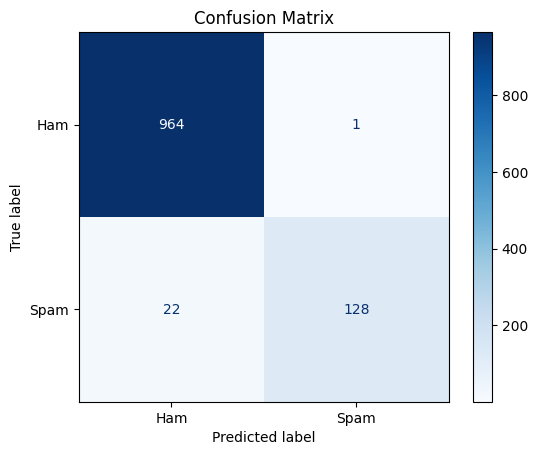

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


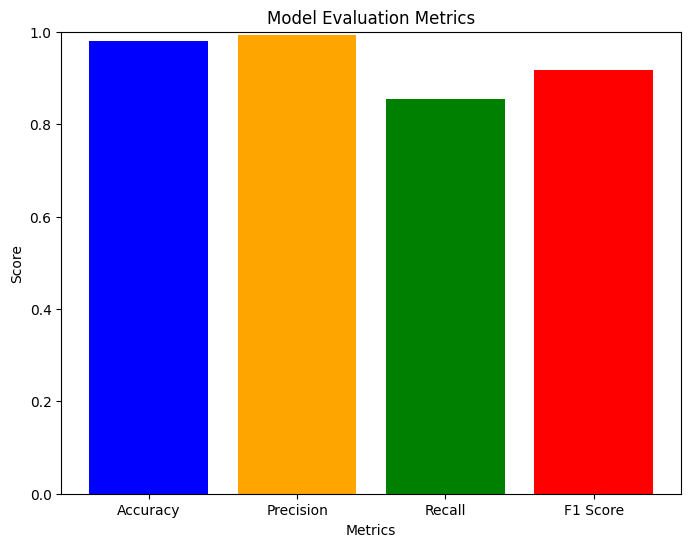

In [10]:
import matplotlib.pyplot as plt

# Model evaluation metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(names, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()


# Code

In [11]:
# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

# Download and access dataset from online kaggle api
import kagglehub

path = kagglehub.dataset_download("shantanudhakadd/email-spam-detection-dataset-classification")
print("Path to dataset files:", path)

# Set up dataset path
dataset_path = f"{path}/spam.csv" 

# Load dataset
data = pd.read_csv(dataset_path, encoding='ISO-8859-1')


# Inspect dataset
print(data.head())


# Assigns all stop words to a set for easy lookup
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to email body column to create new column 'processed_text'
data['processed_text'] = data['v2'].apply(preprocess_text)  

# Feature Engineering with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X = tfidf_vectorizer.fit_transform(data['processed_text']).toarray()
y = data['v1'].apply(lambda x: 1 if x == 'spam' else 0)  # Convert 'spam' to 1 and 'ham' to 0

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with multinomial naive bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Path to dataset files: /kaggle/input/email-spam-detection-dataset-classification
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Model Evaluation Metrics:
Accuracy: 0.98
Precision: 0.99
Recall: 0.85
F1 Score: 0.92
